In [2]:
from UTILITY_quickstart import *
import math
from scipy.stats import moment
import numpy as np

folder = '/sdf/home/k/kladov/impact_bmad_container_notebooks/BluePill/'

# linear chirp

## verification that no R51 or R53 are present

### Generate the initial bunch

In [8]:
init_mod = [15]

for mod_index in range(len(init_mod)):
    file = 'beams/AfterL1_simple'
    file1 = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index])+'um' + '_1amp'
    
    match_impact_file = folder + file + '.h5'
    match_impact_file_r = folder + file1 + '.h5'
    
    P=ParticleGroup(match_impact_file)
    P1 = P.copy()
    
    indexes_to_leave = []
    for (i,p) in enumerate(P1):
        if(np.random.rand()<1-0.5*(math.sin(2*math.pi*((p.t)[0])*3*10**8/(init_mod[mod_index]*(10**-6)))+1)):
            indexes_to_leave.append(i)
            
    indices = np.array(indexes_to_leave)
    P1=P1[indices]
    
    P1.charge = 0.2e-9
    P1.write(match_impact_file_r)

### Usual size

#### generate the bunch

In [9]:
for mod_index in range(len(init_mod)):
    file = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index])+'um' + '_01amp'
    file1 = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index]) +'um' + '_01amp' + '_r'
    
    match_impact_file = folder + file + '.h5'
    match_impact_file_r = folder + file1 + '.h5'
    
    chirp = -15
    
    P=ParticleGroup(match_impact_file)
    P.drift_to_t()
    P1 = P.copy()
    N = np.size(P.x)
    P1.x = 1*P.x
    P1.y = 1*P.y
    P1.z = P.z - np.mean(P.z)
    P1.pz = np.ones(N)*np.mean(P.pz) + 0.01*(P.pz-np.mean(P.pz)) + chirp*np.mean(P.pz)*P1.z
    P1.drift_to_z()
    
    indexes_to_leave = []
    for (i,p) in enumerate(P1):
        if(np.random.rand()<1):
            indexes_to_leave.append(i)
            
    indices = np.array(indexes_to_leave)
    P1=P1[indices]
    
    P1.charge = 1e-9
    P1.write(match_impact_file_r)

#### look at the initial distribution

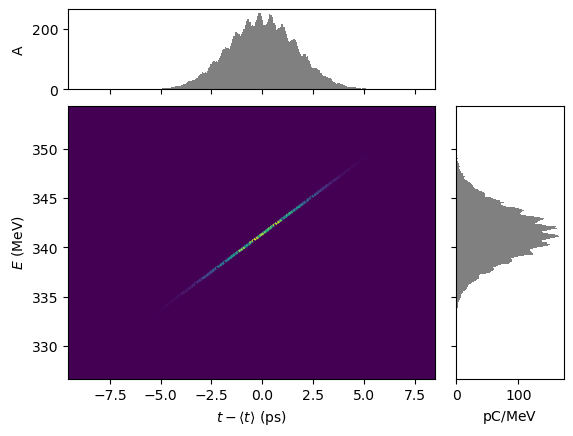

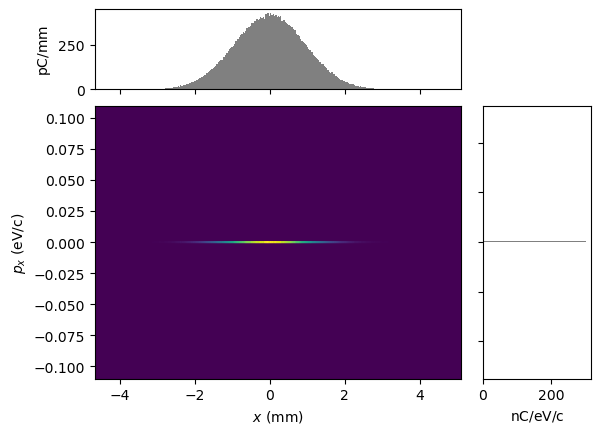

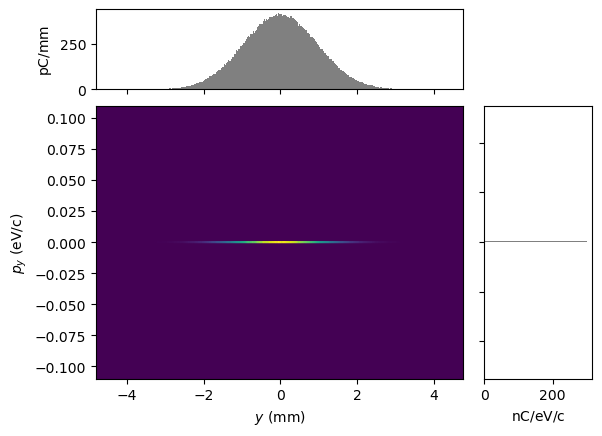

In [10]:
file1 = 'beams/AfterL1_simple' + '_' + str(15)+'um' + '_1amp_r'
match_impact_file_r = folder + file1 + '.h5'
P1=ParticleGroup(match_impact_file_r)
display(plotMod(P1, 'delta_t', 'energy',  bins=300))
display(plotMod(P1, 'x', 'px',  bins=300))
display(plotMod(P1, 'y', 'py',  bins=300))

#### run sim

In [11]:
for mod_index in range(len(init_mod)):
    file1 = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index])+'um' + '_1amp' + '_r'
    match_impact_file_r = folder + file1 + '.h5'
    temp_impact_file_suffix = '/' + file1 + '.h5'
    
    P=ParticleGroup(match_impact_file_r)
    l = len(P)
    
    tao = initializeTao(
        inputBeamFilePathSuffix = temp_impact_file_suffix,
        numMacroParticles = l,
        loadDefaultLatticeTF = True,
        csrTF = False,
        lsc = False,
        defaultsFile = 'setLattice_configs/defaults.yml'
    )

    trackBeam(tao, 
              trackStart = "ENDL1F", 
              trackEnd = "BC11CEND"
             )

    pre = 'from_L1end_to_BC11end/' + str(init_mod[mod_index])+'um_'
    suf = '_noCSR_noSC_noWakes_1amp_chirp-15'

    locations=['ENDL1F','BC11CBEG','BC11CEND']
    for ind in range(len(locations)):
        P = getBeamAtElement(tao, locations[ind])
        P.write(folder+pre+locations[ind]+suf +'.h5')

Environment set to:  /sdf/home/k/kladov/impact_bmad_container_notebooks/BluePill
Tracking to end
CSR off, SC off
Overwriting lattice with setLattice() defaults
Number of macro particles = 499991


#### look at the result

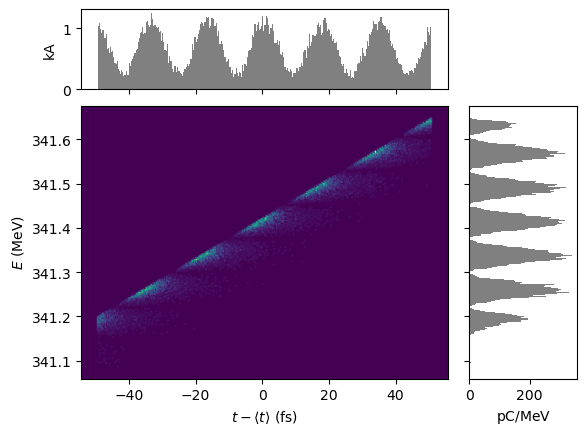

0.0013943589509297486
114777.75926465636
0.002656766121933662
25036.24212201134
0.0


In [12]:
pre = 'from_L1end_to_BC11end/' + str(15)+'um_'
suf = '_noCSR_noSC_noWakes_1amp_chirp-15'
P = ParticleGroup(folder+pre+'BC11CEND'+suf +'.h5')
P.drift_to_z()
indexes_to_leave = []
meanT = np.mean(P.t)
for (i,p) in enumerate(P):
    if(np.abs(p.t-meanT)<((15e-6)/(3e8))):
        indexes_to_leave.append(i)
indices = np.array(indexes_to_leave)
Pt=P[indices]
#display(plotMod(Pt, 'z', 'delta_t',  bins=300))
display(plotMod(Pt, 'delta_t', 'energy',  bins=300))
#display(plotMod(Pt, 'x', 'px',  bins=300))
#display(plotMod(Pt, 'y', 'py',  bins=300))
print(moment(Pt.x, moment=2) ** 0.5)
print(moment(Pt.px, moment=2) ** 0.5)
print(moment(Pt.y, moment=2) ** 0.5)
print(moment(Pt.py, moment=2) ** 0.5)
print(moment(Pt.z, moment=2) ** 0.5)

### small size (1.2 mm)

#### Make the bunch

In [13]:
for mod_index in range(len(init_mod)):
    file = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index])+'um' + '_01amp'
    file1 = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index]) +'um' + '_01amp' + '_01transverse' + '_r'
    
    match_impact_file = folder + file + '.h5'
    match_impact_file_r = folder + file1 + '.h5'
    
    chirp = -15
    
    P=ParticleGroup(match_impact_file)
    P.drift_to_t()
    P1 = P.copy()
    N = np.size(P.x)
    P1.x = 0.1*P.x
    P1.y = 0.1*P.y
    P1.z = P.z - np.mean(P.z)
    P1.pz = np.ones(N)*np.mean(P.pz) + 0.01*(P.pz-np.mean(P.pz)) + chirp*np.mean(P.pz)*P1.z
    P1.drift_to_z()
    
    indexes_to_leave = []
    for (i,p) in enumerate(P1):
        if(np.random.rand()<1):
            indexes_to_leave.append(i)
            
    indices = np.array(indexes_to_leave)
    P1=P1[indices]
    
    P1.charge = 1e-9
    P1.write(match_impact_file_r)

#### initial bunch lookup

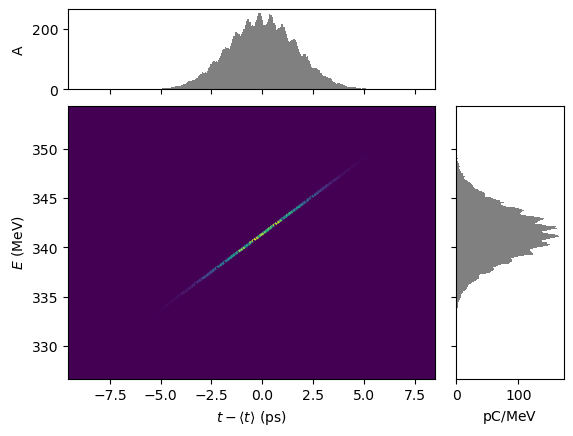

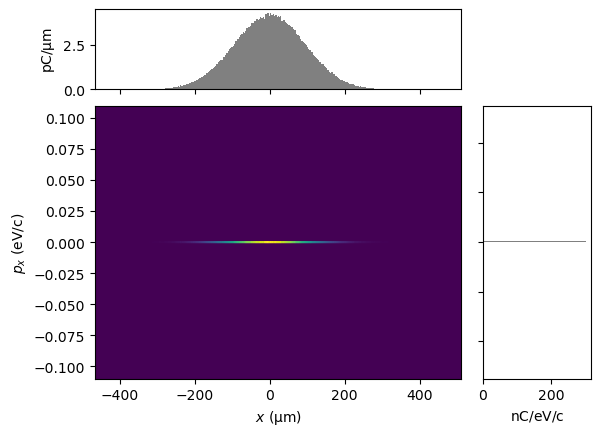

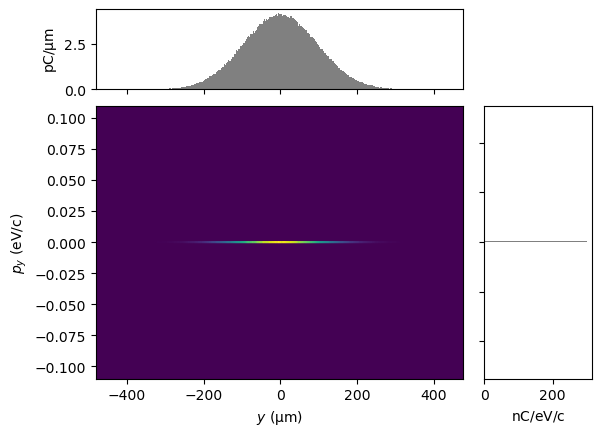

In [14]:
file1 = 'beams/AfterL1_simple' + '_' + str(15)+'um' + '_1amp_01transverse_r'
match_impact_file_r = folder + file1 + '.h5'
P1=ParticleGroup(match_impact_file_r)
display(plotMod(P1, 'delta_t', 'energy',  bins=300))
display(plotMod(P1, 'x', 'px',  bins=300))
display(plotMod(P1, 'y', 'py',  bins=300))

#### run sim

In [15]:
for mod_index in range(len(init_mod)):
    file1 = 'beams/AfterL1_simple' + '_' + str(init_mod[mod_index])+'um' + '_1amp' + '_01transverse' + '_r'
    match_impact_file_r = folder + file1 + '.h5'
    temp_impact_file_suffix = '/' + file1 + '.h5'
    
    P=ParticleGroup(match_impact_file_r)
    l = len(P)
    
    tao = initializeTao(
        inputBeamFilePathSuffix = temp_impact_file_suffix,
        numMacroParticles = l,
        loadDefaultLatticeTF = True,
        csrTF = False,
        lsc = False,
        defaultsFile = 'setLattice_configs/defaults.yml'
    )

    trackBeam(tao, 
              trackStart = "ENDL1F", 
              trackEnd = "BC11CEND"
             )

    pre = 'from_L1end_to_BC11end/' + str(init_mod[mod_index])+'um_'
    suf = '_noCSR_noSC_noWakes_1amp_01transv_chirp-15'

    locations=['ENDL1F','BC11CBEG','BC11CEND']
    for ind in range(len(locations)):
        P = getBeamAtElement(tao, locations[ind])
        P.write(folder+pre+locations[ind]+suf +'.h5')

Environment set to:  /sdf/home/k/kladov/impact_bmad_container_notebooks/BluePill
Tracking to end
CSR off, SC off
Overwriting lattice with setLattice() defaults
Number of macro particles = 499991
done 1 from 1


#### look at the result

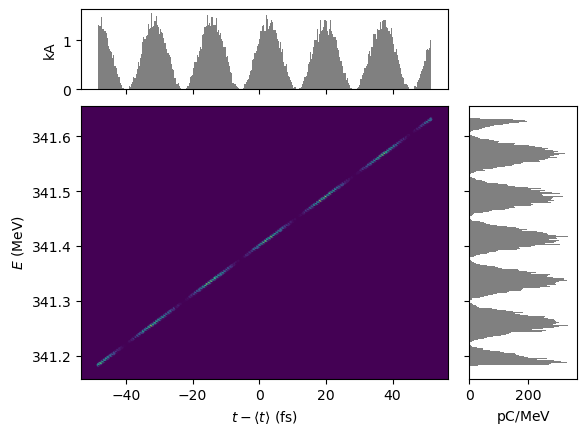

0.00013907514639692115
11448.658051749237
0.0002637966489303636
2486.7977159855855
0.0


In [16]:
pre = 'from_L1end_to_BC11end/' + str(15)+'um_'
suf = '_noCSR_noSC_noWakes_1amp_01transv_chirp-15'
P = ParticleGroup(folder+pre+'BC11CEND'+suf +'.h5')
#P.drift_to_z()
indexes_to_leave = []
meanT = np.mean(P.t)
for (i,p) in enumerate(P):
    if(np.abs(p.t-meanT)<((15e-6)/(3e8))):
        indexes_to_leave.append(i)
indices = np.array(indexes_to_leave)
Pt=P[indices]
#display(plotMod(Pt, 'z', 'delta_t',  bins=300))
display(plotMod(Pt, 'delta_t', 'energy',  bins=300))
#display(plotMod(Pt, 'x', 'px',  bins=300))
#display(plotMod(Pt, 'y', 'py',  bins=300))
print(moment(Pt.x, moment=2) ** 0.5)
print(moment(Pt.px, moment=2) ** 0.5)
print(moment(Pt.y, moment=2) ** 0.5)
print(moment(Pt.py, moment=2) ** 0.5)
print(moment(Pt.z, moment=2) ** 0.5)

# What was changed

In [ ]:
# in the UTILITY_quickstart
tao.cmd(f'set bmad_com csr_and_space_charge_on = F')
tao.cmd(f'set ele * space_charge_method = off')

tao.cmd(f'set bmad_com sr_wakes_on = F')
tao.cmd(f'set bmad_com lr_wakes_on = F')
tao.cmd(f'set global rad_int_calc_on = T')
tao.cmd(f'set bmad_com aperture_limit_on = F')

def getBeamAtElement(tao, eleString, tToZ = True):
    P = ParticleGroup(data=tao.bunch_data(eleString))
    P = P[P.status == 1]        
    return P

# What is simulated

In [15]:
keys = tao.lat_list("*", "ele.key")
ss = tao.lat_list("*", "ele.s")
names = tao.lat_list("*", "ele.name")

elements = np.stack([ss, names, keys], axis=1)
values_to_remove = ['Drift', 'Instrument','VKicker','HKicker','Lcavity']

location1 = np.argwhere(elements=='ENDL1F')[0,0]
location2 = np.argwhere(elements=='BC11CEND')[0,0]

trunc_array = elements[location1:location2+1]
clean_array = trunc_array[~np.isin(trunc_array[:, 2], values_to_remove)]

print(clean_array)

[['39.64324935640673' 'ENDL1F' 'Marker']
 ['39.64324935640673' 'BEGBC11_1' 'Marker']
 ['40.01453835640673' 'QM11312#1' 'Quadrupole']
 ['40.01453835640673' 'BPM11312' 'Monitor']
 ['40.06793835640673' 'QM11312#2' 'Quadrupole']
 ['40.412339356406726' 'BC11CBEG' 'Marker']
 ['40.615839573934814' 'BCX11314' 'Sbend']
 ['41.20759178159961' 'PR11316' 'Monitor']
 ['41.58332335997809' 'CQ11317' 'Quadrupole']
 ['43.265060034766236' 'BCX11331' 'Sbend']
 ['43.416000034766235' 'BPM11333' 'Monitor']
 ['43.56348703476623' 'PR11334' 'Monitor']
 ['43.860766034766236' 'PR11335' 'Monitor']
 ['44.29876025229432' 'BCX11338' 'Sbend']
 ['44.89887144428558' 'PR11342' 'Monitor']
 ['45.14819156115192' 'CE11334' 'Rcollimator']
 ['45.73140715255373' 'SQ11340' 'Quadrupole']
 ['46.0083978519093' 'CQ11352' 'Quadrupole']
 ['46.94798187225028' 'BCX11355' 'Sbend']
 ['46.94798187225028' 'CNT1B' 'Marker']
 ['46.94798187225028' 'BC11CEND' 'Marker']]


# Possible reasons for R51 R53 terms (or other sources of bunch length growth):

Achromatic bends: start after BX10751, so no not-achromatic by design sbends left

Wakefields: turned off (tao.cmd(f'set bmad_com sr_wakes_on = F'), tao.cmd(f'set bmad_com lr_wakes_on = F'))

Space Charge and SR: turned off (tao.cmd(f'set bmad_com csr_and_space_charge_on = F'), tao.cmd(f'set ele * space_charge_method = off'))

Quadrupoles inside BC11: turned off (see below)

Other dipoles or kickers: turned off (see below)

Dipoles in the chicane being not rectangular (chicane from sector bends is not achromatic): they are rectangular (see below)

## Check that all the quads in the chicane are off

In [12]:
names=['CQ11317','SQ11340','CQ11352']
for n in names:
    print(tao.ele_gen_attribs(n))

{'L': 0.108, 'units#L': 'm', 'TILT': 0.0, 'units#TILT': 'rad', 'K1': 0.0, 'units#K1': '1/m^2', 'FRINGE_TYPE': 'None', 'FRINGE_AT': 'Both_Ends', 'SPIN_FRINGE_ON': True, 'R0_ELEC': 0.0, 'units#R0_ELEC': 'm', 'R0_MAG': 0.0, 'units#R0_MAG': 'm', 'STATIC_LINEAR_MAP': False, 'FQ1': 0.0, 'units#FQ1': 'm', 'FQ2': 0.0, 'units#FQ2': 'm', 'X_PITCH': 0.0, 'units#X_PITCH': 'rad', 'Y_PITCH': 0.0, 'units#Y_PITCH': 'rad', 'X_OFFSET': 0.0, 'units#X_OFFSET': 'm', 'Y_OFFSET': 0.0, 'units#Y_OFFSET': 'm', 'Z_OFFSET': 0.0, 'units#Z_OFFSET': 'm', 'HKICK': 0.0, 'units#HKICK': '', 'VKICK': 0.0, 'units#VKICK': '', 'BL_HKICK': -0.0, 'units#BL_HKICK': 'T*m', 'BL_VKICK': -0.0, 'units#BL_VKICK': 'T*m', 'B1_GRADIENT': -0.0, 'units#B1_GRADIENT': 'T/m', 'PTC_CANONICAL_COORDS': True, 'DELTA_REF_TIME': 3.60249645700883e-10, 'units#DELTA_REF_TIME': 'sec', 'P0C': 333498821.655305, 'units#P0C': 'eV', 'E_TOT': 333499213.140607, 'units#E_TOT': 'eV', 'X_PITCH_TOT': 0.0, 'units#X_PITCH_TOT': 'rad', 'Y_PITCH_TOT': 0.0, 'units#Y

## Check that all the correctors are off

In [13]:
names=['YC11105','XC11104','YC11141','XC11140','XC11202','YC11203','YC11273','XC11272','YC11305','XC11304','YC11321']
for n in names:
    print(tao.ele_gen_attribs(n))

{'L': 0.0, 'units#L': 'm', 'TILT': 0.0, 'units#TILT': 'rad', 'KICK': 0.0, 'units#KICK': '', 'FRINGE_TYPE': 'None', 'FRINGE_AT': 'Both_Ends', 'SPIN_FRINGE_ON': True, 'STATIC_LINEAR_MAP': False, 'X_PITCH': 0.0, 'units#X_PITCH': 'rad', 'Y_PITCH': 0.0, 'units#Y_PITCH': 'rad', 'X_OFFSET': 0.0, 'units#X_OFFSET': 'm', 'Y_OFFSET': 0.0, 'units#Y_OFFSET': 'm', 'Z_OFFSET': 0.0, 'units#Z_OFFSET': 'm', 'BL_KICK': -0.0, 'units#BL_KICK': 'T*m', 'PTC_CANONICAL_COORDS': True, 'DELTA_REF_TIME': 0.0, 'units#DELTA_REF_TIME': 'sec', 'P0C': 140315605.085107, 'units#P0C': 'eV', 'E_TOT': 140316535.555603, 'units#E_TOT': 'eV', 'X_PITCH_TOT': 0.0, 'units#X_PITCH_TOT': 'rad', 'Y_PITCH_TOT': 0.0, 'units#Y_PITCH_TOT': 'rad', 'X_OFFSET_TOT': 0.0, 'units#X_OFFSET_TOT': 'm', 'Y_OFFSET_TOT': 0.0, 'units#Y_OFFSET_TOT': 'm', 'Z_OFFSET_TOT': 0.0, 'units#Z_OFFSET_TOT': 'm', 'TILT_TOT': 0.0, 'units#TILT_TOT': 'rad', 'REF_TIME_START': 7.11501406071855e-08, 'units#REF_TIME_START': 'sec', 'INTEGRATOR_ORDER': 0, 'NUM_STEPS': 1

## Check that the bends in the chicane are rectangular (pole tilt sum = angle)

From the 'impact_bmad_container_notebooks/facet2-lattice/bmad/master/BC11.bmad' file:

bcx11314: sbend, type = "1.69D6.28T", hgap = gb11/2, l = lb11, angle = -ab11, e1 = 0, fint = 0.387, e2 = -ab11,
          fintx = 0.387
          
bcx11331: sbend, type = "1.69D6.28T", hgap = gb11/2, l = lb11, angle = +ab11, e1 = +ab11, fint = 0.387, e2 = 0,
          fintx = 0.387
          
bcx11338: sbend, type = "1.69D6.28T", hgap = gb11/2, l = lb11, angle = +ab11, e1 = 0, fint = 0.387, e2 = +ab11,
          fintx = 0.387
          
bcx11355: sbend, type = "1.69D6.28T", hgap = gb11/2, l = lb11, angle = -ab11, e1 = -ab11, fint = 0.387, e2 = 0,
          fintx = 0.387